<p style="direction:rtl; font-size:30px; text-align:center; font-weight: bold;" >
تحليل استكشافي لاستخدام الوجوه التعبيرية في المجتمع السعودي (عبر موقع تويتر)

<p style="direction:rtl; font-size:20px; text-align:center; font-style: italic" > 
بقلم : فهد الحازمي (<a href="https://twitter.com/fahd09">Twitter</a> | <a href="https://github.com/fahd09">Github</a>)


<p style="direction:rtl; text-align:right"> 
شكل الانتشار العالمي للوجوه التعبيرية - التي تعرف بالايموجي- بداية ثورة جديدة في فضاء اللغة الالكترونية، حيث أصبحت وسيلة لغوية وتواصلية لا غنى عنها خصوصاً لدى الأجيال الشابة.

في هذا التحليل نحاول أن نلتمس أبعاد هذ التغير في أحد أشهر مواقع التواصل الالكتروني، تويتر. حيث سنقوم بقراءة عدد ضخم من التغريدات ومن كافة مناطق المملكة العربية السعودية ومن ثم البحث عن الوجوه التعبيرية وتحليل ما يمكن أن تعكسه من متغيرات اجتماعية.

<br>
<br>

سنقوم أولاً باستيراد المكتبات اللازمة في بايثون وتثبيت بعض المتغيرات..

</p>

In [1]:
import re
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn')
%matplotlib inline


from sklearn.feature_extraction.text import CountVectorizer
import nltk

<p style="direction:rtl; text-align:right">

جمعت التغريدات كالتالي. أولاً، جهزت قائمة بأسماء بعض المدن مع خطوط الطول وخطوط العرض. تم استخدمت الواجهة البرمجية لموقع تويتر (Twitter Search API) مدعوماً بمكتبة (Tweepy) في بايثون لقراءة آلاف التغريدات التي تحتوي على أي وجه تعبيري ضمن قائمة 74 وجه تعبيري شائع. ثم حفظت نتائج البحث في جدول مستقل يحتوي على المدينة، تاريخ التغريدة، نص التغريدة وأخيراً مصدر التغريدة (البرنامج المستخدم لكتابتها). بالطبع، لا غنى عن مكتبة pandas في التعامل مع الجداول.

<br /> <br />
يلي استيراد قاعدة البيانات طباعة رأس الجدول لنتأكد من سلامة البيانات..

</p>


In [2]:
tweets = pd.read_csv('./data/tweets_emojis_dataset_74emojis.csv', encoding='utf-8')

In [3]:
tweets.shape

(140656, 4)

In [4]:
tweets.head()

,city,created_at,text,source
0,Riyadh,Wed Jul 12 18:47:24 +0000 2017,#امسيه_منيف_الخمشي\n\nيكفي انها كلمات مؤثرة تت...,Twitter Web Client
1,Riyadh,Wed Jul 12 18:46:49 +0000 2017,وإن أحبُّوك ألفاً فلن يحبُّوك إلا قِطرة من بحري❤️,Twitter for iPhone
2,Riyadh,Wed Jul 12 18:46:49 +0000 2017,البيت الاخير يختصر كل المعاناة ❤️❤️😢 https://t...,Twitter for iPhone
3,Riyadh,Wed Jul 12 18:46:31 +0000 2017,هلا هلا ❤❤😢 miss you \nالطقم حكايه ثانيه افضل ...,Twitter for Android
4,Riyadh,Wed Jul 12 18:46:30 +0000 2017,قلب قلببببي❤️❤️❤️❤️.,Twitter for iPhone


<p style="direction:rtl; text-align:right">

كلنا نعرف كمية التغريدات المزعجة (السبام) في تويتر العربي. ابتدا من " تبي ينلحس مخك؟" إلى الإعلانات الغثيثة ومروراً بحسابات الأدعية والأذكاء والتي سرعان ما تصل إلى أعداد متابعين كبيرة لتُباع مرة أخرى لمن أحب بريق الشهرة. على أية حال، هنا طريقة بسيطة وفعالة لفلترة التغريدات المزعجة وذلك بتحديد مصدر التغريدة. إن كنت مهتماً بمجال تحليل تغريدات تويتر وتواجه مشكلة في التغريدات المزعجة فلدي أفكار أخرى قليلة لا أمانع من مشاركتها، ولكن هذه الطريقة أدنا (الفلترة بالمصدر) هي الطريقة الأكثر فعالية.

</p>


In [5]:
good_sources = ['Twitter Web Client', 'Twitter for iPhone', 'Twitter for Android', 'Twitter for iPad', 'Twitter Lite']

In [6]:
tweets = tweets[tweets.source.isin(good_sources)]

<p style="direction:rtl; text-align:right">
كإجراء احتياطي، سنقوم بحذف الصفوف المكررة إن كان هناك صفوف مكررة حتى يحوي كل صف على تغريدة فريدة وغير مكررة. يلي ذلك طباعة عدد التغريدات في الجدول ألا وهو 134763 وهو عدد لا بأس به لغرض الاستكشاف
</p>

In [7]:
tweets.drop_duplicates(inplace=True)
tweets.reset_index(inplace=True, drop=['index'])

In [8]:
print('Total number of tweets: ', len(tweets))

Total number of tweets:  134763


<p style="direction:rtl; font-size:25px; text-align:right; font-weight: bold;" > 
تنظيف البيانات

<p style="direction:rtl; text-align:right"> 
في الخانات التالية، سنقوم بأصعب مهمة في مجال تحليل البيانات، ألا هي تنظيف البيانات. ما يزيد المهمة صعوبة هو تنظيف النصوص العربية نظراً لوجود الكثير من الأخطاء الإملائية في النصوص العربية والزخارف وما إلى ذلك.

<br /> <br /> 

هناك الكثير من الخطوات التي يمكن عملها في مهمة تنظيف نص التغريدات ولكني اقتصرت على خطوات أساسية أعتقد أنها كافية لإعطاء نتائج على قدر لا بأس به من الدقة للمجالات العامة. بالمناسبة، نحن لن نحتاج إلى أي نصوص في هذه التدوينة سوى الوجوه التعبيرية ( والتي لا تستدعي كل هذه الخطوات على أية حال). ولكن لأني أيضاً قمت بالعديد من التحليلات الجانبية المتعلقة بنصوص التغريدات والتي قد لا يتسع المجال للحديث عنها.

</p>

In [9]:
def denoise_arabic(text):
    noise = re.compile(""" ّ    | # Tashdid
                             َ    | # Fatha
                             ً    | # Tanwin Fath
                             ُ    | # Damma
                             ٌ    | # Tanwin Damm
                             ِ    | # Kasra
                             ٍ    | # Tanwin Kasr
                             ْ    | # Sukun
                             ـ     # Tatwil/Kashida
                         """, re.VERBOSE)
    text = re.sub(noise, '', text)
    return text

def normalize_arabic(text):
    text = re.sub("[إأٱآا]", "ا", text, flags=re.MULTILINE)
    text = re.sub("ى", "ي", text, flags=re.UNICODE)
    text = re.sub("ؤ", "ء", text, flags=re.UNICODE)
    text = re.sub("ئ", "ء", text, flags=re.UNICODE)
    return text

def clean_tweet(text):
    URL_re = r'(http|https|ftp)://[a-zA-Z0-9\\./]+' # replace URLs
    HASH_re = r'#(\w+)' # replace Hashtags
    HANDLE_re = r'@(\w+)' # replace Handles
    REPUNC_re = r'[\?\.\!]+(?=[\?\.\!])' # normalize repeating punctuations (e.g., ?? or !!!)
    RECHAR_re = r'(\w)\1{1,}' # remove repeating charachters 
    NEWLINE_re = r'[\n]+' # remove new lines 
    NUM_CHARS_AR_re = r'[١٢٣٤٥٦٧٨٩٠؟!٪:،؛.]+'
    NUM_CHARS_EN_re = r'[0123456789!"$%&\\\'()*+,-.;<>=?@[]^_`{═}—“”•‹|~«°»˓ ̮ ̯]+'
    WHITE_SPACE_re = r'\s+'
    
    text = re.sub(URL_re,  r'', text, flags=re.UNICODE)
    text = re.sub(HASH_re,  r'', text, flags=re.UNICODE)
    text = re.sub(HANDLE_re,  r'', text, flags=re.UNICODE)
    text = re.sub(REPUNC_re,  r' ', text, flags=re.UNICODE)
    text = re.sub(RECHAR_re,  r'\1', text, flags=re.UNICODE)
    text = re.sub(NEWLINE_re,  r'', text, flags=re.UNICODE)
    text = re.sub(NUM_CHARS_AR_re,  r'', text, flags=re.UNICODE)
    text = re.sub(NUM_CHARS_EN_re,  r'', text, flags=re.UNICODE)
    text = re.sub(WHITE_SPACE_re,  r' ', text, flags=re.UNICODE)
    
    return text

tweets.text = tweets.text.apply(lambda x: denoise_arabic(str(x)))
tweets.text = tweets.text.apply(lambda x: normalize_arabic(str(x)))
tweets.text = tweets.text.apply(lambda x: clean_tweet(str(x)))
toremove = '! ... ? ! \u200b ...  ?  y ֆ ⤵ ⇜ ✎ ❃ ❥ ༺ ༻ ┄ ࿐ | ᅠ\u200b \u200c \u200d — “ ” • ‹ \u2066 \u2067 \u2069 ⃣ ↓ ↴ ⇣ ⌝ ┈ ┉ ┊ ═ ! " # $ % & \' ( ) * + , - ... / 0 1 10 10/10 12 13 1373 14 140جرام 15 16 17 17,0 18 19 1935 2 20 2015 2017 2020 2030 21 24 25 26 27 28 2leh_q 3 30 36 4 40 5 5/5 50 6 60 61 7 7/7 70 8 80 9 90 ; < = > ? @ [ ] ^ _ _20 ` { } ~ « ° » ˓ ̮ ̯'        
regex = re.compile("(" + "|".join(map(re.escape, toremove.split(' '))) + ")")
tweets.text = tweets.text.apply(lambda x: re.sub(regex, r'', x))
tweets.text = tweets.text.apply(lambda x: re.sub(r'[0123456789A-Za-z?!]', r'', x))

<p style="direction:rtl; text-align:right"> 
بعد أن انتهيت من تنظيف النصوص، اكتشفت أن خانة " المدينة" في عدد قليل جداً من الصفوف لم يكن صحيحا. لتسوية الأمر، سنقرأ جدول المدن ثم نفلتر كل الصفوف الخاطئة.
</p>

In [10]:
cities = pd.read_csv('./data/cities_lat_long.csv')
tweets = tweets[tweets.city.isin(cities.city.tolist())]
tweets.reset_index(inplace=True, drop=['index'])

<p style="direction:rtl; text-align:right">
هذه هي قائمة المدن في قاعدة البيانات الحالية..
</p>

In [11]:
tweets.city.unique()

array(['Riyadh', 'Tabuk', 'Jeddah', 'Hail', 'Mecca', 'Medina', 'Jubail',
       'Hofuf', 'Jazan', 'Al-Kharj', 'Taif', 'Qatif', 'Dammam', 'Abha',
       'Khamis Mushait', 'Najran', 'Buraidah', 'Yanbu', 'Khobar'], dtype=object)

<p style="direction:rtl; font-size:25px; text-align:right; font-weight: bold;" >
تحليل البيانات الاستكشافي (Exploratory Data Analysis)

<p style="direction:rtl; text-align:right;">
نبدأ الآن استكشاف البيانات. استكشاف البيانات هي عملية إبداعية وفضولية في المقام الأول، إذا لا يوجد لها أي قواعد تحكمها ولا مبادئ تقف عندها. الهدف هو أن نفهم بنية البيانات وطبيعتها بشكل أفضل. تقوم هذه المرحلة بشكل أساسي على التساؤلات التي نود الإجابة عنها. أدناه سردت أبرز الأسئلة التي طالما كانت حاضرة في ذهني ودفعتني للقيام بهذا المشروع..
<br>
<ul style="direction:rtl">
<li>ماهي الرموز التعبيرية الأكثر استخداماً في جميع المدن وماهي الرموز التعبيرية الأقل شيوعاً؟ وهل تشبه هذه القائمة موقع <a href="http://emojitracker.com">EmojiTracker</a> المختص برصد الوجوه التعبيرية الأكثر استخداماً في موقع تويتر؟</li>
<li>ماهي المدن الأكثر استخداماً للرموز التعبيرية وماهي المدن الأقل استخداماً للرموز التعبيرية؟</li>
<li>هل هناك رموز تعبيرية محددة تستخدم بشكل أكثر في كل مدينة؟ مثلاً هل هناك رموز تعبيرية يستخدمها سكان جدة بنسبة أعلى من سكان الدمام؟</li>
<li>هناك رموز تعبيرية "إيجابية" مثل القلب والورد والوجه الضاحك، بينما هناك رموز تعبيرية سلبية مثل القلب المكسور والوجه الباكي وغيرها. هل نستطيع معرفة أي المدن أكثر استخداماً للرموز الإيجابية وأيها أكثر استخداماً للرموز السلبية؟</li>
<li>أيضاً، بما أن لدينا معلومات حول وقت كتابة التغريدات، هل حديث الليل يشبه حديث النهار؟</li>
</ul>
</p>

<p style="direction:rtl; text-align:right;">
لا أحب أن أستطرد في الأسئلة التي يمكننا البحث عنها حيث أن هذه البيانات غنية وثرية جداً. كل هذه الأسئلة ونحن لم نستخدم بعد نصوص التغريدات أو علاقات المغردين ببعضهم البعض وغير ذلك من الأسئلة التي تصلح لمشاريع قادمة. في هذا المشروع سوف نركز فقط على أنماط استخدام الرموز التعبيرية بين مجموعة من مدن المملكة..
<br/> <br/>
الآن سنبدأ بتجهيز البيانات بشكل مناسب للإجابة عن الأسئلة. بكل بساطة، سنجهز جدولاً آخر للتغريدات بحيث تبقى الصفوف تمثل التغريدات ولكن الأعمدة هذه المرة تمثل الرموز التعبيرية. وكل رمز تعبيري يستخدم سيكون له قيمة 1 فيما ستكون الباقية 0. ومن هذا الجدول نستطيع المضي قدماً في التحليل. 
</p>

In [13]:
emojis_to_extract = '☀ ☁ ☄ ★ ☎ ☔ ☕ ☘ ☝ ☹ ☺ ☻ ♀ ♂ ♠ ♡ ♥ ♨ ♩ ♪ ⚕ ⚘ ⚜ ⚡ ⚫ ⚽ ⛅ ✅ ✈ ✉ ✋ ✌ ✍ ✔ ✨ ✿ ❀ ❁ ❃ ❄ ❋ ❌ ❕ ❗ ❣ ❤ ❥ ⤵ ⬇ ⭐ ️ 🇦 🇧 🇨 🇪 🇬 🇭 🇮 🇰 🇱 🇲 🇳 🇵 🇶 🇷 🇸 🇹 🇺 🇼 🇾 🌈 🌌 🌎 🌑 🌕 🌙 🌚 🌝 🌞 🌟 🌤 🌥 🌧 🌨 🌬 🌱 🌲 🌴 🌷 🌸 🌹 🌺 🌻 🌼 🌾 🌿 🍀 🍁 🍂 🍃 🍆 🍇 🍌 🍏 🍑 🍒 🍔 🍥 🍦 🍫 🍭 🍰 🍳 🍺 🍻 🍼 🎀 🎁 🎂 🎈 🎉 🎊 🎓 🎤 🎧 🎨 🎬 🎭 🎵 🎶 🎷 🎹 🎻 🎼 🏁 🏃 🏆 🏳 🏹 🏻 🏼 🏽 🏾 🏿 🐒 🐙 🐥 🐸 👀 👄 👅 👆 👇 👈 👉 👊 👋 👌 👍 👎 👏 👐 👑 👞 👧 👨 👩 👪 👭 👰 👵 👶 👸 👻 👼 👽 💀 💁 💃 💅 💆 💉 💋 💌 💍 💎 💐 💓 💔 💕 💖 💗 💘 💙 💚 💛 💜 💝 💞 💟 💡 💢 💣 💤 💥 💦 💧 💨 💩 💪 💫 💬 💭 💯 💰 💵 💸 📌 📍 📖 📚 📝 📞 📣 📩 📮 📯 📱 📲 📷 📻 🔁 🔐 🔑 🔕 🔗 🔝 🔞 🔥 🔪 🔫 🔴 🔵 🔶 🔹 🔻 🕊 🕋 🕑 🕛 🕞 🕺 🖐 🖒 🖕 🖖 🖤 🗓 🗝 🗣 😀 😁 😂 😃 😄 😅 😆 😇 😈 😉 😊 😋 😌 😍 😎 😏 😐 😑 😒 😓 😔 😕 😖 😗 😘 😙 😚 😛 😜 😝 😞 😟 😠 😡 😢 😣 😤 😥 😦 😧 😨 😩 😪 😫 😬 😭 😮 😯 😰 😱 😲 😳 😴 😶 😷 😹 😻 😼 😽 😾 😿 🙀 🙁 🙂 🙃 🙄 🙅 🙆 🙇 🙈 🙉 🙊 🙋 🙌 🙍 🙏 🚀 🚗 🚫 🚬 🚶 🛑 🤐 🤒 🤓 🤔 🤕 🤗 🤘 🤙 🤚 🤛 🤝 🤞 🤢 🤣 🤤 🤦 🤧 🤷 🥀 🦋'
emojis_to_extract = emojis_to_extract.split(' ')

In [14]:
word_vectorizer_count = CountVectorizer(ngram_range=(1, 1),
                                        strip_accents='unicode', 
                                        tokenizer=nltk.tokenize.TweetTokenizer().tokenize,
                                        vocabulary=emojis_to_extract,
                                       )

In [15]:
%%time
text_vectors = word_vectorizer_count.fit_transform(tweets.text)
print(text_vectors.shape)

(134763, 362)
CPU times: user 11.9 s, sys: 71.2 ms, total: 11.9 s
Wall time: 15.1 s


In [16]:
features = np.array(word_vectorizer_count.get_feature_names())

<p style="direction:rtl; text-align:right;">
لابد أن نتأكد أن الجدول الجديد مبني بشكل صحيح.. سنطبع تغريدة عشوائية أولاً، ثم نرى ماهي الرموز التعبيرية التي تساوي 1 لذات التغريدة. يجب أن يكون الاثنان متساويان.
</p>

In [17]:
idx = np.random.choice(tweets.shape[0], 1)[0]
print('Tweet:\t\t', tweets.text[idx], 
      '\nFeatures:\t\t', features[np.where(text_vectors.todense()[idx]>0)[1]]
     )

Tweet:		  اذا لقيتي عطيني 🤗💔 
Features:		 ['💔' '🤗']


In [18]:
idx = np.random.choice(tweets.shape[0], 1)[0]
print('Tweet:\t\t', tweets.text[idx], 
      '\nFeatures:\t\t', features[np.where(text_vectors.todense()[idx]>0)[1]]
     )

Tweet:		 جد 😍😍😍💙💙 ياسلام 😍😍👏 خلص ولا لسا  
Features:		 ['👏' '💙' '😍']


In [19]:
idx = np.random.choice(tweets.shape[0], 1)[0]
print('Tweet:\t\t', tweets.text[idx], 
      '\nFeatures:\t\t', features[np.where(text_vectors.todense()[idx]>0)[1]]
     )

Tweet:		  نتفتي الحلوه فيها كياته موطبيعي 😭❤❤🍥  
Features:		 ['❤' '🍥' '😭']


<p style="direction:rtl; text-align:right;">
يبدو أن الأمور على ما يرام (ماعدا بعض الأخطاء المتعلقة بترميز النصوص وليس بسبب أداءنا للتحليل).
</p>

In [20]:
emoj_df = pd.DataFrame(text_vectors.todense(), columns=features)

In [21]:
emoj_df.head()

,☀,☁,☄,★,☎,☔,☕,☘,☝,☹,...,🤝,🤞,🤢,🤣,🤤,🤦,🤧,🤷,🥀,🦋
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [22]:
tweets_emoj = pd.concat([tweets.city, emoj_df], axis=1, ignore_index=False)

In [23]:
tweets_emoj.head()

,city,☀,☁,☄,★,☎,☔,☕,☘,☝,...,🤝,🤞,🤢,🤣,🤤,🤦,🤧,🤷,🥀,🦋
0,Riyadh,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Riyadh,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Riyadh,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Riyadh,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Riyadh,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


<p style="direction:rtl; text-align:right;">
بعد أن تم بناء الجدول بشكل سليم وإضافة خانة المدينة، سنقوم الآن بالخطوة النهائية وهي تجميع الصفوف لتصبح المدينة في خانة الصفوف والرموز التعبيرية في خانة الأعمدة. الأرقام الآن ستمثل مجموع المرات التي استخدم فيها رمز تعبيري ما في التغريدات القادمة من مدينة ما. طبعت رأس الجدول لنرى كيف يبدو ذلك.
</p>

In [24]:
tweets_emoj_city = tweets_emoj.groupby(['city']).agg(np.sum)

In [25]:
tweets_emoj_city.head()

,☀,☁,☄,★,☎,☔,☕,☘,☝,☹,...,🤝,🤞,🤢,🤣,🤤,🤦,🤧,🤷,🥀,🦋
city,,,,,,,,,,,,,,,,,,,,,
Abha,4,2,0,0,0,4,12,0,3,222,...,2,0,7,23,5,97,1,0,18,3
Al-Kharj,0,0,0,0,0,0,2,0,1,47,...,0,1,0,1,8,18,0,1,3,0
Buraidah,1,3,0,0,0,0,10,4,5,116,...,0,0,1,23,3,24,2,1,4,0
Dammam,1,3,0,0,5,0,12,4,3,182,...,2,3,3,101,8,167,1,4,14,2
Hail,2,5,1,1,0,1,16,1,1,149,...,0,1,3,22,4,88,0,8,15,4


<p style="direction:rtl; text-align:right;">
قبل أن نبدأ أي تحليل (نعم لم نحلل شيئاً بعد!)، من الواضح أن لدينا مشكلة في توزيع استخدامات الرموز التعبيرية بين المدن. فمدينة كالرياض يوجد بها عدد هائل من المغردين وعدد هائل من التغريدات كذلك ومن غير المنطقي مقارنتها مع مدينة نجران مثلاً بدون احتساب التفاوت في عدد التغريدات وعدد المغردين.

<br/> <br/>

لحل هذا الإشكال، سنقوم بتغيير الأرقام لتعكس النسب (داخل المدينة) وذلك بقسمة عدد مرات استخدام أي رمز تعبيري ( مثلاً الوجه الضاحك) داخل مدينة ما بعدد الوجود التعبيرية في تغريدات تلك المدينة. بعد هذه الخطوة نستطيع أن نقارن بين المدن لنقول مثلا أن نسبة استخدام الوجه الضاحك داخل الرياض أكثر من نسبة استخدام الوجه الضاحك داخل نجران بالرغم من اختلاف عدد التغريدات من كل مدينة.
</p>

In [26]:
tweets_emoj_city_size = tweets_emoj.groupby(['city']).size()

In [27]:
tweets_emoj_city_ratio = np.divide(tweets_emoj_city, np.sqrt(tweets_emoj_city_size[:,None]))

<p style="direction:rtl; text-align:right;">
أدناه شكل الجدول النهائي والذي يتكون الآن من نسب بدلاً من أرقام صحيحة.

<br />

للإجابة عن سؤالنا الأول، نستطيع مباشرة أن نحتسب "متوسط" استخدام الرموز التعبيرية داخل كل مدينة وثم نرتب النتائج تصاعدياً لنرى أي المدن لديها أكبر عدد من استخدام الرموز التعبيرية (نهاية القائمة) وأي المدن لديها أقل عدد من الرموز التعبيرية (بداية القائمة).

</p>

In [28]:
tweets_emoj_city_ratio.head()

,☀,☁,☄,★,☎,☔,☕,☘,☝,☹,...,🤝,🤞,🤢,🤣,🤤,🤦,🤧,🤷,🥀,🦋
city,,,,,,,,,,,,,,,,,,,,,
Abha,0.041536,0.020768,0.000000,0.000000,0.000000,0.041536,0.124609,0.000000,0.031152,2.305257,...,0.020768,0.000000,0.072688,0.238833,0.051920,1.007252,0.010384,0.000000,0.186913,0.031152
Al-Kharj,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.040639,0.000000,0.020319,0.955016,...,0.000000,0.020319,0.000000,0.020319,0.162556,0.365751,0.000000,0.020319,0.060958,0.000000
Buraidah,0.012537,0.037612,0.000000,0.000000,0.000000,0.000000,0.125373,0.050149,0.062686,1.454324,...,0.000000,0.000000,0.012537,0.288357,0.037612,0.300895,0.025075,0.012537,0.050149,0.000000
Dammam,0.008719,0.026157,0.000000,0.000000,0.043595,0.000000,0.104629,0.034876,0.026157,1.586874,...,0.017438,0.026157,0.026157,0.880628,0.069753,1.456088,0.008719,0.034876,0.122067,0.017438
Hail,0.018734,0.046835,0.009367,0.009367,0.000000,0.009367,0.149873,0.009367,0.009367,1.395697,...,0.000000,0.009367,0.028101,0.206076,0.037468,0.824304,0.000000,0.074937,0.140506,0.037468


In [29]:
tweets_emoj_city_ratio.mean(axis=1).sort_values()

city
Najran            0.177028
Jazan             0.182721
Khamis Mushait    0.251193
Al-Kharj          0.312089
Yanbu             0.333752
Taif              0.360855
Jubail            0.388580
Hofuf             0.410994
Tabuk             0.448958
Buraidah          0.492625
Khobar            0.649636
Abha              0.668996
Hail              0.695209
Dammam            0.713978
Riyadh            0.723166
Medina            0.732782
Jeddah            0.736642
Mecca             0.748855
Qatif             0.826966
dtype: float64

<p style="direction:rtl; text-align:right;">
كما نستطيع عمل ذات الشيء مع الرموز التعبيرية. وهو أخذ متوسط نسب استخدام كل رمز تعبيري في جميع المدن لنعرف ماهي الرموز التعبيرية الأكثر استخداماً
</p>

In [30]:
tweets_emoj_city_ratio.mean(axis=0).sort_values()[::-1][:10]

😂    29.799377
️    20.908354
❤    18.033336
💔    13.382810
😭    10.055071
💙     9.735467
😍     5.278099
🏻     3.945968
🌹     3.881957
💛     3.713981
dtype: float64

<p style="direction:rtl; text-align:right;">
أو الرموز التعبيرية الأقل استخداماً...
</p>

In [31]:
tweets_emoj_city_ratio.mean(axis=0).sort_values()[:10]

🛑    0.000000
🕞    0.000000
🕑    0.000000
🍏    0.000462
🕛    0.001069
🍒    0.002823
🍇    0.003647
🍌    0.004194
🔑    0.004369
🍑    0.004648
dtype: float64

<p style="direction:rtl; text-align:right;">
كما نستطيع تمثيل هذه البيانات في شكل يسهل فهمه فيما يعرف ب "الخرائط الحرارية". بكل بساطة، هي إعادة رسم لذات الجدول بنفس الشكل، ولكن الأرقام الآن يتم تحويلها إلى ألوان مأخوذة من طيف لوني يجعل من السهل رؤية القيم العالية والقيم المتدنية.
</p>

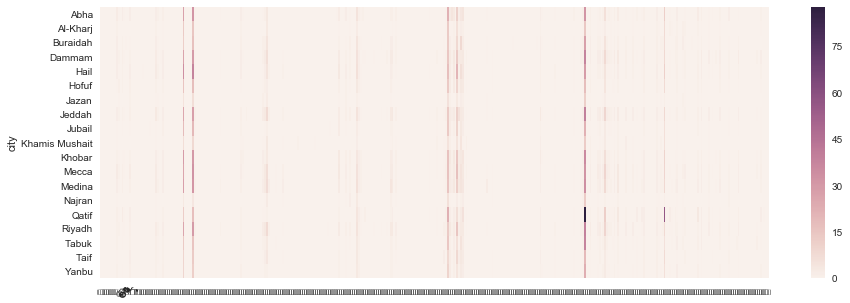

In [32]:
fig, ax = plt.subplots(figsize=(15,5))
sns.heatmap(tweets_emoj_city_ratio, ax=ax)

<p style="direction:rtl; text-align:right;">
يبدو أن لدينا مشكلة شبيهة في الرموز التعبيرية فيما يخص اختلاف توزيع الاستخدام. فالوجه الضاحك مثلاً يحتل المركز الأول وبالتالي ستكون نسبته عالية في أغلب المدن (وهو بالمناسبة أحد الخطوط العمودية الداكنة في الشكل أعلاه). وهذا لن يجعلنا نعرف إن كانت مدينة ما تستخدمه بشكل أكثر من مدن أخرى (بعد أخذ كل العوامل الأخرى بالاعتبار). فما الحل مع الرموز التعبيرية ؟

<br> <br>

الحل بسيط جداً. فكر مثلاً كيف سنقارن بين رمز الوجه الضاحك ورمز الفتاة الراقصة. نحن نعرف أن "متوسط" استخدام الرمزين مختلف أساساً وبالتالي لكل رمز توزيع مختلف بين المدن. أبسط حل هو أن نقوم بتثبيت هذا المتوسط عند قيمة محددة لكل الرمزين لنتمكن بعدها من المقارنة العادلة. هذا بلغة الإحصاء يسمى 
<a href="https://en.wikipedia.org/wiki/Normalization_(statistics)">Normalization</a> وأبسط أنواعه يسمى z-scoring ويعني طرح قيمة المتوسط من قيم التوزيع ليصبح المتوسط الجديد هو صفر، ثم قسمة قيم التوزيع على الانحراف المعياري ليصبح الانحراف المعياري موحداً بين الرموز كذلك.

</p>

In [33]:
df_scaled = (tweets_emoj_city_ratio - tweets_emoj_city_ratio.mean(axis=0)) / tweets_emoj_city_ratio.std(axis=0)

<p style="direction:rtl; text-align:right;"> 
وكما هو واضح من الشكل التالي، نستطيع أن نرى الأنماط المختلفة لكل رمز تعبيري بشكل أوضح. 

خذ بالاعتبار أن متوسط استخدام كل رمز تعبيري هو صفر. بالتالي، حينما تأخذ أي مدينة (لنأخذ أبها مثلاً)، ستجد أن القيم الموجبة (النقاط الحمراء) تمثل معدل استخدام أعلى من باقي الرموز التعبيرية، فيما القيم السالبة (النقاط الزرقاء) تمثل معدل استخدام أقل من باقي الرموز التعبيرية.

</p>

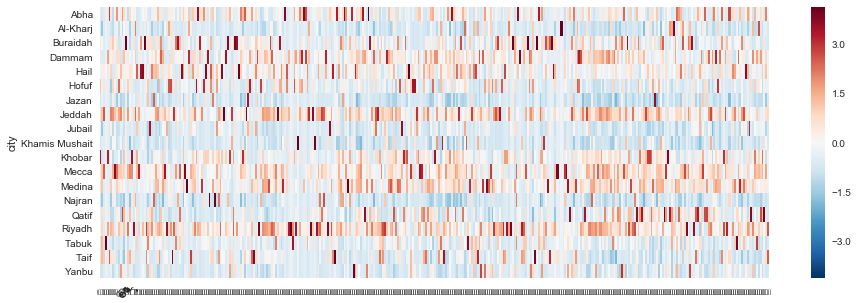

In [34]:
fig, ax = plt.subplots(figsize=(15,5))
sns.heatmap(df_scaled, ax=ax)

<p style="direction:rtl; text-align:right;"> 
بعد هذه الخطوة ، نحن على أتم الجاهزية للإجابة عن أبرز الوجوه التعبيرية المستخدمة التي تميز مدينة ما عن المدن الأخرى وهذا ما سنراه لكل المدن.
</p>

In [35]:
print('')
df_scaled = df_scaled.fillna(0)
for city in tweets.city.unique():
    print(city,':', ' '.join(df_scaled.loc[city].sort_values()[::-1].index[:15].tolist()))
    print('\n')


Riyadh : 🍏 📞 🌲 🍻 😼 🎤 🙀 ❀ ♩ 🎁 📚 🍔 🍌 📲 🚬


Tabuk : ★ 🤓 💟 🍑 🤣 💍 🌿 ⛅ ❌ 😑 📮 💦 😱 💢 🍳


Jeddah : 🇺 🌟 🍀 🍼 💸 👅 💚 🍺 👶 ❋ 🌌 💢 🎉 😣 🙉


Hail : 👪 🌙 🇮 ⚡ ❣ 🇹 🤙 🔻 ⚜ 🎬 🏹 📖 💤 🍇 🇲


Mecca : 🕋 ❥ 🖐 ☝ 👻 ✿ 👼 ⚘ 🕺 😮 👭 💬 🙅 😻 😗


Medina : 🏁 ⤵ 💪 🔵 🖒 🤕 🍃 💡 🇬 💨 🗓 😛 🌺 👌 💫


Jubail : 🎧 👞 ✅ 🤛 👄 🇶 💝 👶 🌬 ❀ 🌤 🙃 👉 ⚕ 👭


Hofuf : 👵 👰 🇧 🌥 🇭 🙍 🌴 ❃ ❁ 🍒 👑 🗝 📌 ☺ 💆


Jazan : 😨 🌤 ✉ 🇳 🎹 ⛅ 🙅 🌱 🙇 🖖 💢 🙀 ⚘ 😹 🇮


Al-Kharj : 🕛 😲 🤤 💝 ♪ 📝 😰 😹 ❁ ⬇ 😱 🍺 💍 💥 🗝


Taif : 🎭 🔗 ❄ 🌨 💐 🔶 💥 ⭐ 🦋 ☔ 🌧 💀 🙁 👆 ⚽


Qatif : 😭 🤷 🤝 🖕 🏿 😞 😂 😡 🙂 😰 🙇 ♀ 🙆 🤦 👎


Dammam : 📱 🇰 🇼 🗣 🙌 👊 🍫 🎓 ⬇ 🍰 😀 🌱 💦 ✔ 🌼


Abha : 🐙 🍆 🍭 🎻 📯 🇨 💖 🏾 🔞 🎵 🏆 ☔ 🚶 🍰 🌞


Khamis Mushait : 🍥 🎀 💎 🔫 💞 💋 🌌 🙉 💥 😫 😘 😠 📲 👨 🎻


Najran : 🇵 🇱 🎊 ✉ 😆 🇷 🎈 📮 😝 🎹 🏃 🎷 ❕ ♪ 🌴


Buraidah : 🔝 🔁 ♠ ⚫ 📣 🔹 🌑 🇾 🌕 😙 😿 ❕ 🐥 🍁 🇪


Yanbu : 🏳 😖 😾 💧 💩 🔑 🐒 🔪 ☻ 😈 🌈 🖒 🏹 😴 ⚽


Khobar : 😯 ♨ 💉 ☀ ☎ 👧 🌝 🚗 😤 😥 🌈 👩 😦 🤧 🤢




<p style="direction:rtl; text-align:right;">

بناء على الشكل أعلاه سأذكر انطباعي بخصوص هذه الطريقة لحساب الرموز التعبيرية التي تميز كل مدينة عن أخرى. أعتقد أن هناك طرق أكثر متانة وثقة من هذه الطريقة البسيطة مثل 
<a href="https://en.wikipedia.org/wiki/Correspondence_analysis">Correspondence Analysis</a> أو بناء جدول عدد الرموز أعلاه بطريقة مختلفة مثل استخدام خوارزمية 
<a href="https://en.wikipedia.org/wiki/Tf%E2%80%93idf">TF-IDF</a> بدلاً من العدد.

كما ترى، فهذه الطريقة أعلاه تثبت "المتوسط" بين المدن ليكون في الصفر ولكننا مازلنا نرى أن المدن الكبرى التي تمتلك نصيباً أكبر من التغريدات لديها نصيب الذهب من الرموز التعبيرية وذلك لوجود عدد كبير من القيم الموجبة لدى المدن الكبرى. هذا إما قد يعكس انحيازاً لعدد التغريدات، أو أن المغردين في المدن الكبرى يستخدمون الرموز التعبيرية بشكل أكبر من المغردين في باقي المدن. أميل شخصياً للتفسير اللاحق وذلك لأني أكاد أرى "منطقة حمراء" لكل مدينة أو مجموعة من الرموز التي تميزها عن غيرها على الرغم من قلة كمية التغريدات فيه (شاهد الشكل أعلاه). على أية حال، هذه الطريقة مازالت مفيدة لمعرفة أي الرموز هي الأكثر استخداماً من غير أن نكترث للفروقات بين الرمز الأول والثاني إن كان كبيراً أم ضئيلاً.

</p>

<p style="direction:rtl; font-size:25px; text-align:right; font-weight: bold;" >
تحليل المشاعر (Sentiment Analysis)

<p style="direction:rtl; text-align:right;">
الآن سننتقل للسؤال التالي، وهو حول المحتوى العاطفي للرموز التعبيرية والذي يتراوح من رموز تعبيرية إيجابية (كالقلب أو الوجه الضاحك) إلى رموز تعبيرية سلبية (كالوجه الباكي أو الوجه الغاضب). قد تبدو هذه مهمة صعبة، إذا كيف نحدد "قيمة عاطفية" لكل وجه تعبيري؟ لحسن الحظ، هناك من سبق وقام بهذه المهمة. ففي 
<a href="http://journals.plos.org/plosone/article/file?id=10.1371/journal.pone.0144296&type=printable">ورقة علمية</a>
منشورة في مجلة PLOS One، استخدم الباحثون حوالي مليون تغريدة من أكثر من 13 لغة أوروبية وأكثر من 82 محلل ليخرجوا ببحث ممتع كان هذا المعجم التعبيري - العاطفي أبرز نتائجه. لاحظ أنه قد يكون هناك اختلافات ثقافية طفيفة بين الرموز التعبيرية في التغريدات الأوروبية (سواء بالإنجليزية أو بغيرها) إلا أني أعتقد أن هذه المسائل طفيفة عملياً إذا ما كان الغرض هو المعرفة بشكل عام وليس تصنيف كل تغريدة على حدة مثلاً.

<br><br>
سبق وأن نسخت 
<a href="http://kt.ijs.si/data/Emoji_sentiment_ranking/index.html">الجدول المرفق هنا</a>
من الورقة ليصبح في جدول مستقل قابل للقراءة والاستخدام داخل بايثون.

<br><br>

في هذا الجدول، نجد أن لكل رمز تعبيري "درجة عاطفية" تتراوح من +1 إلى -1، أو من موجب إلى سالب (فيما الصفر يعتبر محايد). سنقوم بقراءة كل تغريدة واستخراج كل الرموز التعبيرية منها، ثم حساب متوسط "الدرجة العاطفية" للتغريدة بناء على الرموز المستخدمة (قد يجادلني البعض في هذا التوجه، ولكن هذا هو الطريق الأبسط على أية حال).

</p>

In [36]:
senti = pd.read_csv('./data/sentiment_scores.csv')

In [37]:
senti.head()

,Char,Image,Unicodecodepoint,Occurrences,Position,Neg,Neut,Pos,Sentiment,bar,name,block
0,😂,😂,0x1f602,14622.0,0.805,0.247,0.285,0.468,0.221,,FACE WITH TEARS OF JOY,Emoticons
1,❤,❤,0x2764,8050.0,0.747,0.044,0.166,0.790,0.746,,HEAVY BLACK HEART,Dingbats
2,♥,♥,0x2665,7144.0,0.754,0.035,0.272,0.693,0.657,,BLACK HEART SUIT,Miscellaneous Symbols
3,😍,😍,0x1f60d,6359.0,0.765,0.052,0.219,0.729,0.678,,SMILING FACE WITH HEART-SHAPED EYES,Emoticons
4,😭,😭,0x1f62d,5526.0,0.803,0.436,0.220,0.343,-0.093,,LOUDLY CRYING FACE,Emoticons


In [38]:
tweets['score'] = tweets.text.apply(lambda x: senti.loc[[emoji in x for emoji in senti['Char']]]['Sentiment'].mean())

<p style="direction:rtl; text-align:right;">
الآن، بعد أن صار لكل تغريدة "درجة عاطفية"، نستطيع أن نجري حساباً بسيطة لمعرفة ترتيب المدن في مدى إيجابية/سلبية الرموز التعبيرية المستخدمة فيها. كما نلاحظ في الشكل القادم، مدينة حائل تحتل الأولى في استخدام الرموز الإيجابية فيما مدينة القطيف تعتبر الأخيرة.
</p>

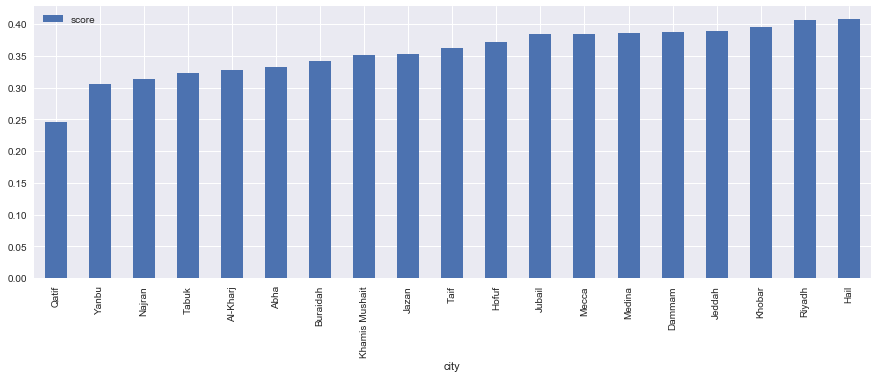

In [39]:
tweets.groupby(['city']).agg({'score':np.mean}).sort_values(by='score').plot(kind='bar', figsize=(15,5))

<p style="direction:rtl; text-align:right;">
وأخيراً، سنقوم باستخدام "الوقت" لمعرفة اختلاف أنماط استخدام الرموز الإيجابية أو السلبية. الشكل التالي يتكون من عدة أشكال مصغرة، شكل لكل مدينة. على محور السينات لدينا ساعات اليوم (من الساعة 12 صباحا في أقصى اليسار إلى منتصف الليل  يمينا)، فيما على محور الصادات لدينا ترمومتر المشاعر في التغريدات المستخرجة من هذه المدينة.

<br><br>
قارن مثلاً جدة والرياض ( والتي تملك مزاجاً سيئاً في فترة الظهرية) وغيرها من المدن. أغلب المدن تزيد القيمة فيها عن 0.3 وهي ذات القيمة في (الشكل 4) من الورقة سابقة الذكر حينما حسبوا متوسط قيمة المشاعر لكل التغريدات. مما يعكس بشكل ما أن استخدام الرموز الإيجابية يغلب على استخدام الرموز السلبية.. فيما تبقى حائل مدينة "الروقان".

</p>

In [40]:
tweets.created_at = pd.to_datetime(tweets.created_at)

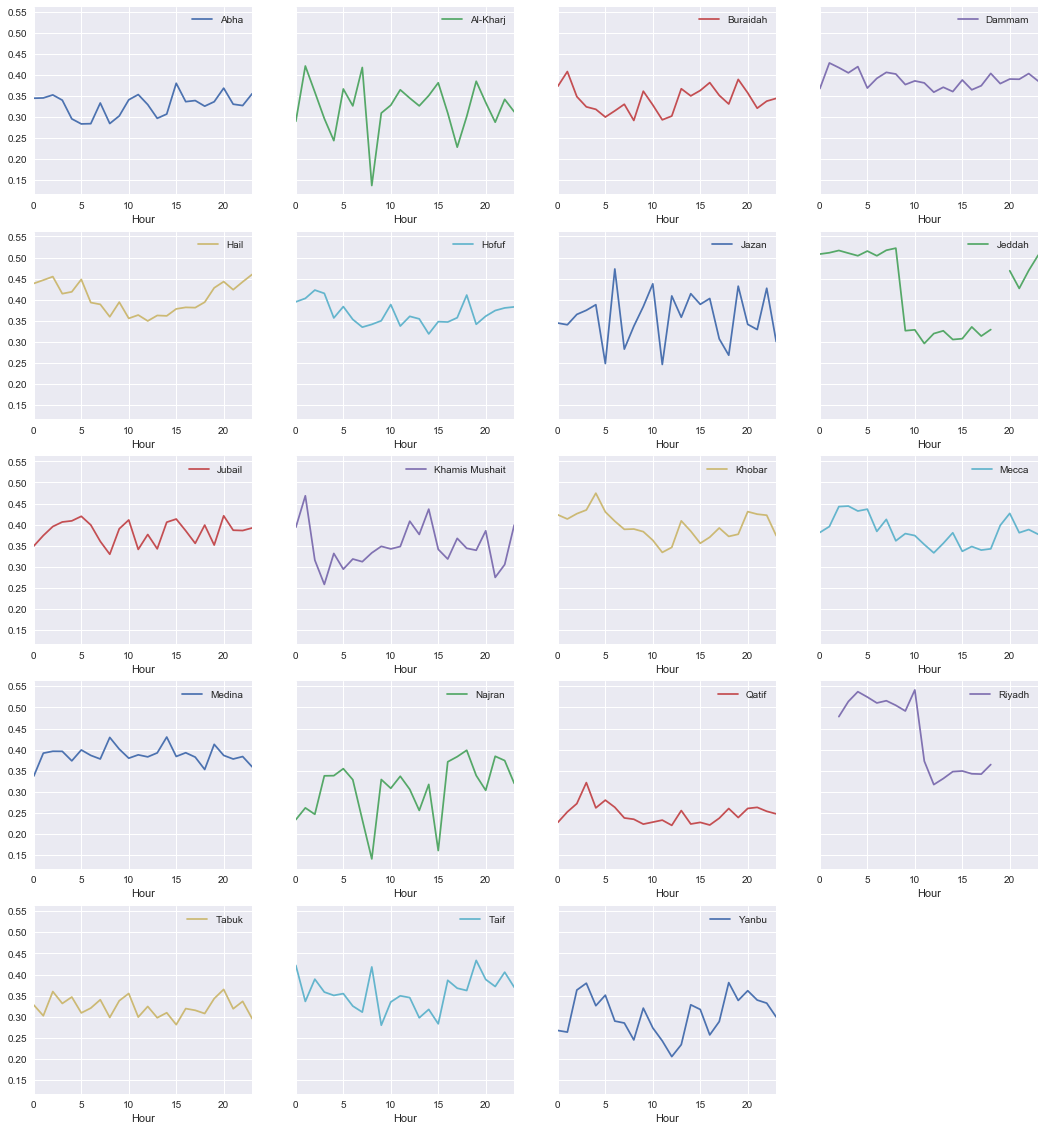

In [41]:
pivoted = tweets.pivot_table('score', 
                              index=tweets.created_at.dt.hour, 
                              columns=tweets.city, 
                              aggfunc=np.mean)
pivoted.index.name = 'Hour'
plo = pivoted.plot(subplots=True, layout=(-1, 4), sharex=False, sharey=True, figsize=(18, 20))

<p style="direction:rtl; font-size:25px; text-align:right; font-weight: bold;" >
الختام..

<p style="direction:rtl; text-align:right;">

لا أود الإطالة كما لا أود مناقشة النتائج بشكل مفصل. بل أحب دائماً أن أترك خيوط تفسير مفتوحة لمن أراد أن يتعمق. بالطبع لا أريد لأي أحد أن يتعمق في تفسير هذه النتائج نظراً للكمية المحدودة (والمنحازة إلى حد كبير) من التغريدات. هذا لا يجعلها غير مفيدة بل هي نقطة بداية لمن أحب التعمق.

<br><br>
كان الهدف من هذه التدوينة التحليلية هي إشباع فضولي العلمي والنقدي من خلال العمل على تحليل البيانات. ولأني أعرف أن الكثير يعتيرهم ذات الفضول ولديهم رغبة كبيرة لإجراء تحليلات مشابهة فقد قررت أولاً استخدام Jupyter Notebooks لكتابة التدوينة، ثم مشاركة الملفات الأولية لتصبح الفرصة متاحة لدى الجميع لإجراء أي تحليلات مشابهة (من دون الحاجة لإبلاغي أو الاستئذان مني في استخدام البيانات).

<br><br>
أتمنى أن تكون قد راقت لكم هذه التدوينة وأشبعت فضولكم كذلك. وربما دفعت بك إلى التفكير في طرق إبداعية لاستخدام البيانات العامة لفهم المجتمع الذي نعيش فيه بشكل أكبر وأدق. إن كانت لديك أي فكرة من هذا القبيل فأرجو التواصل معي لمشاركة المقترحات والأفكار.

<br><br>

إلى أن نراكم في المرة القادمة.. 
<a href="https://twitter.com/fahd09">فهد</a>

</p>